<a href="https://colab.research.google.com/github/thiagothr/APS2/blob/main/APS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image
import os
from skimage import io
from google.colab.patches import cv2_imshow

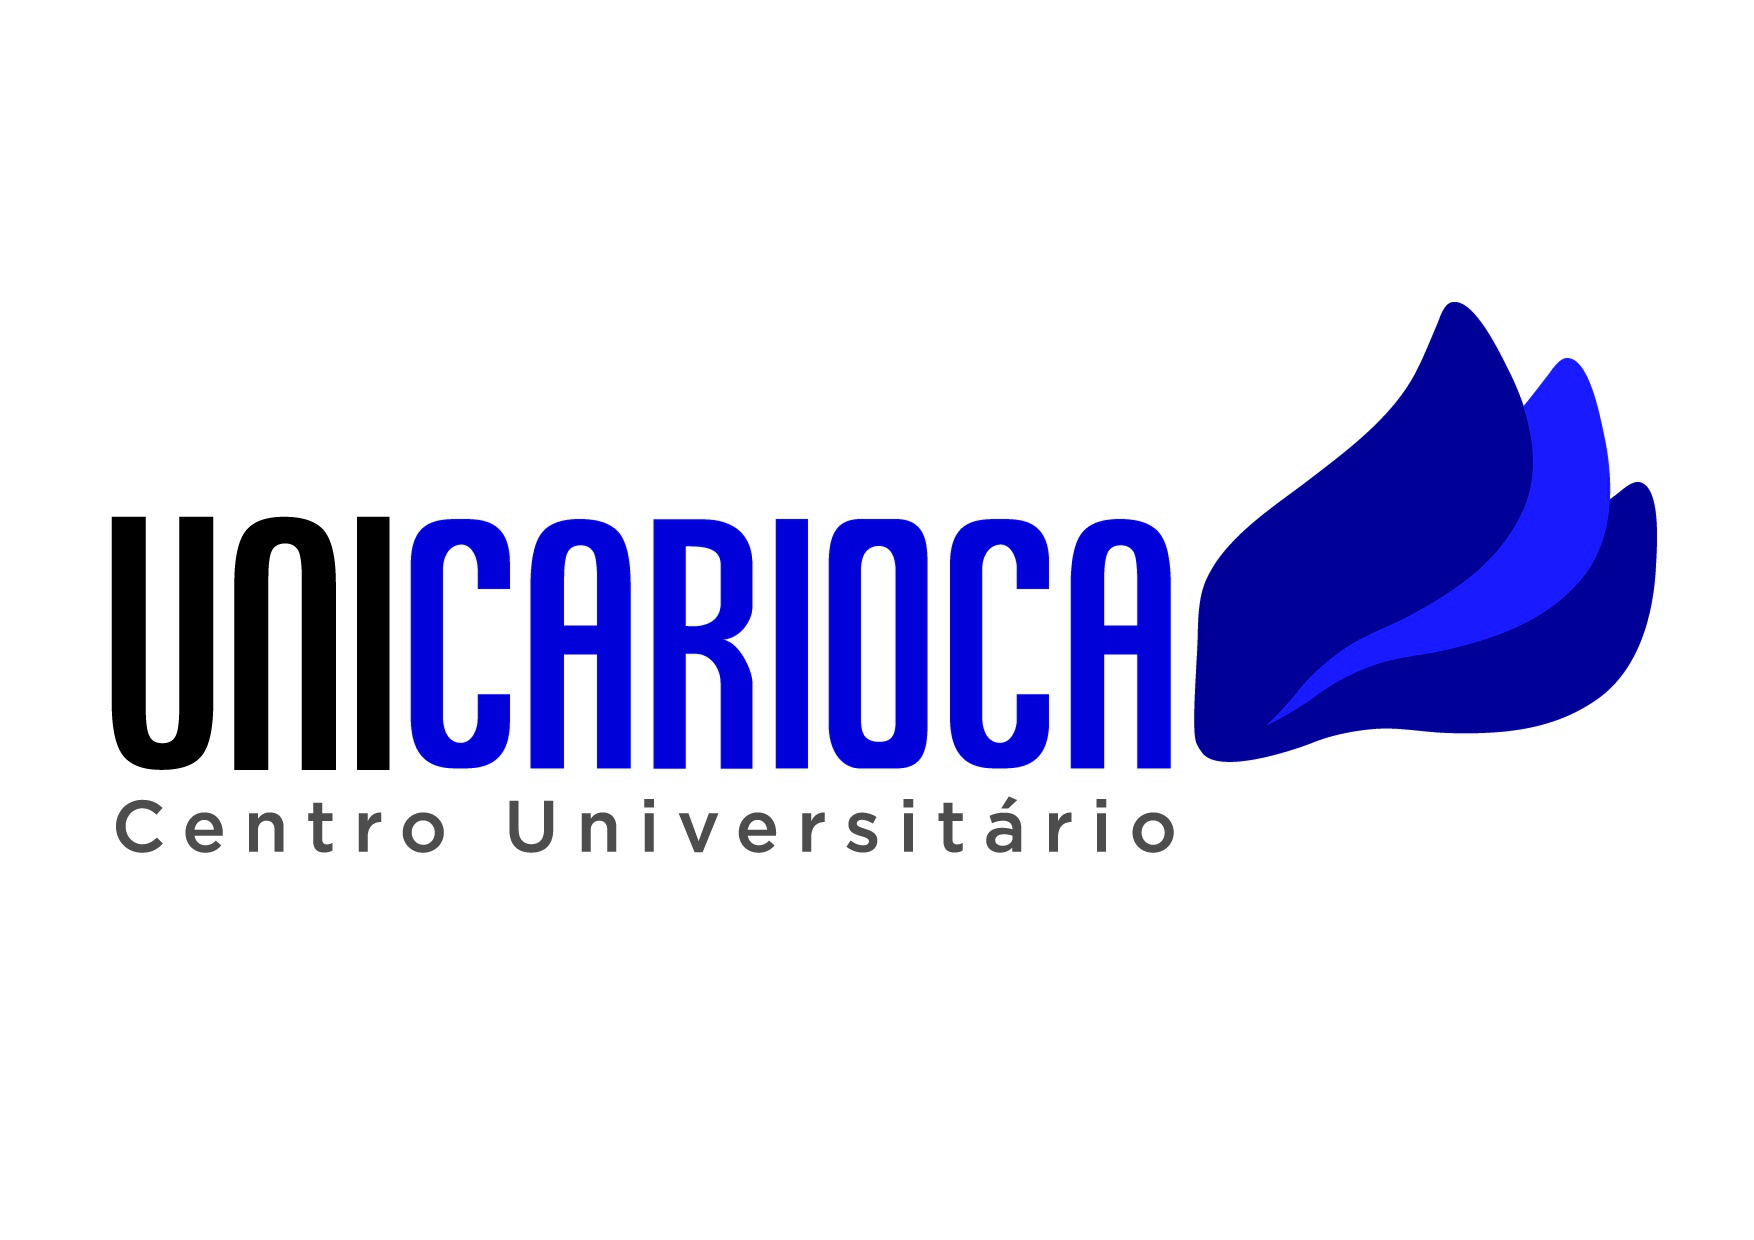

--------------------------------------------------------------------------------------------


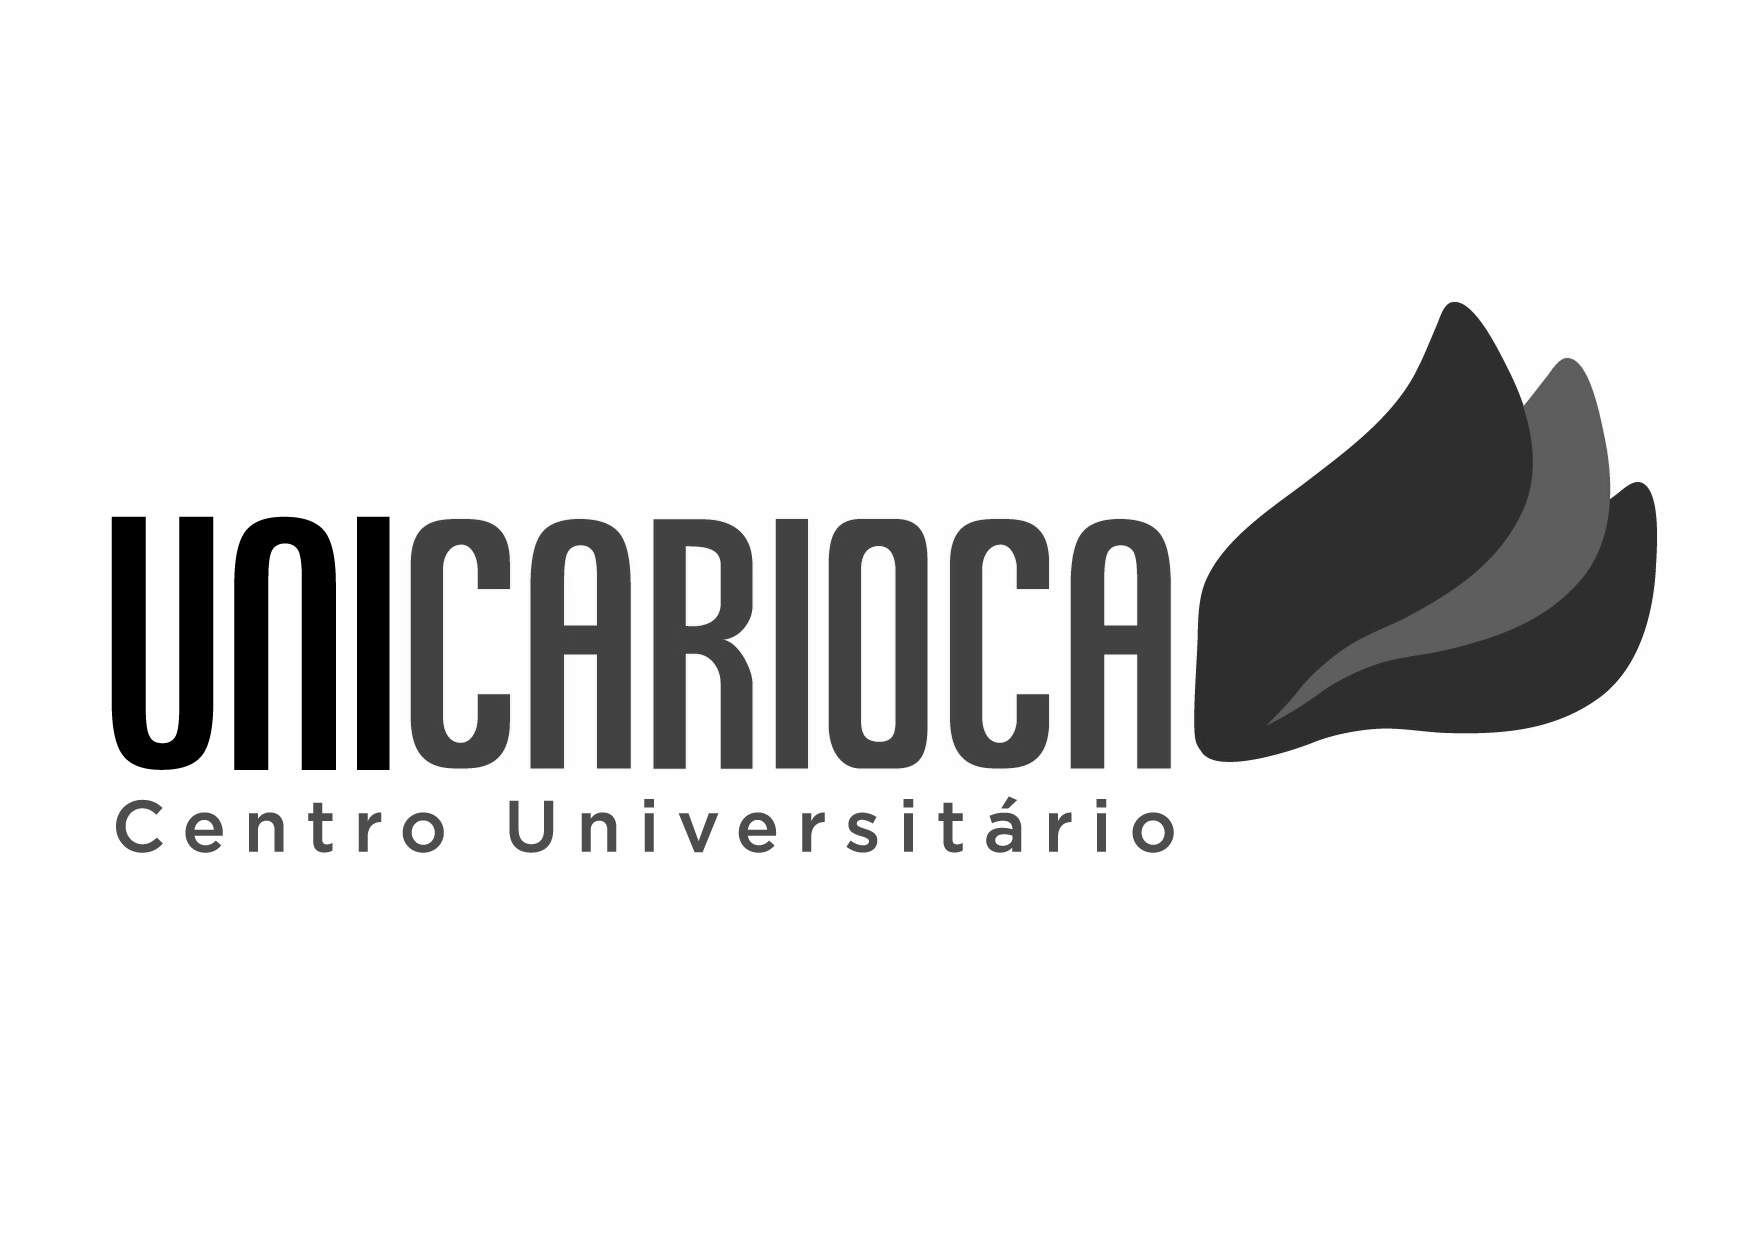

--------------------------------------------------------------------------------------------
----------60%----------
processing...
compressing...
dimensões do canal r: (1240, 1754)
arranging...


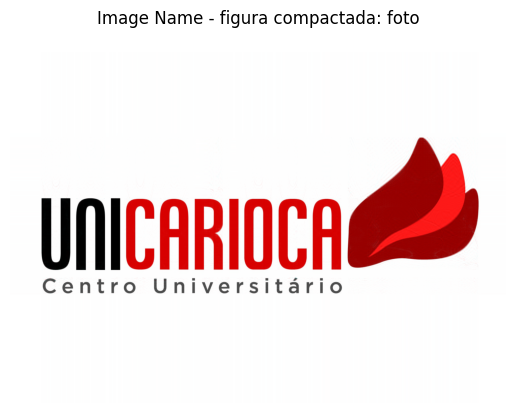

processing...
compressing...
dimensões do canal r: (1240, 1754)
arranging...


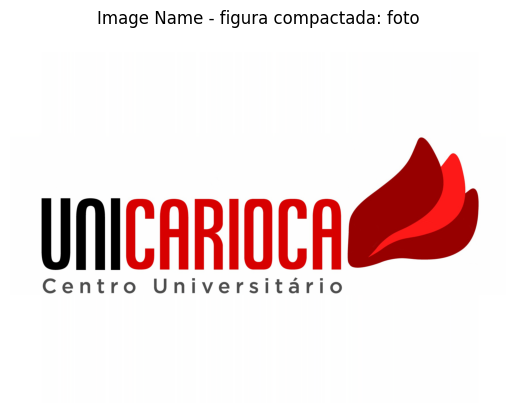

----------70%----------
processing...
compressing...
dimensões do canal r: (1240, 1754)
arranging...


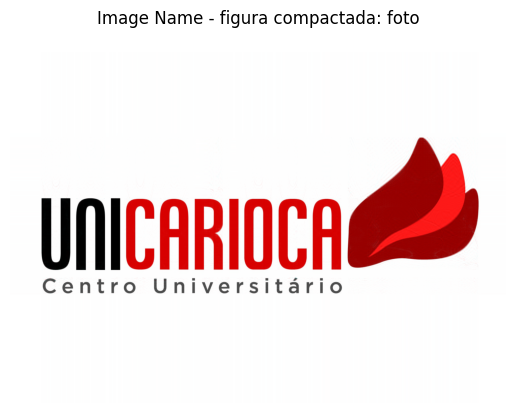

processing...
compressing...
dimensões do canal r: (1240, 1754)
arranging...


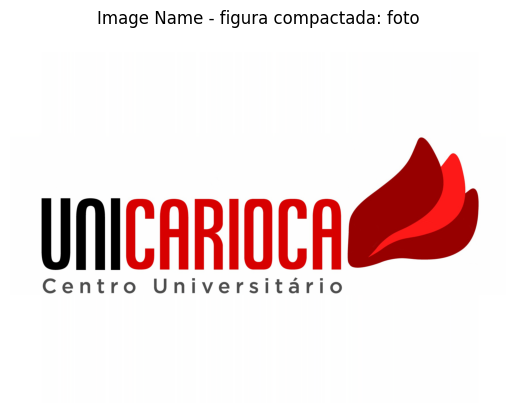

----------80%----------
processing...
compressing...
dimensões do canal r: (1240, 1754)
arranging...


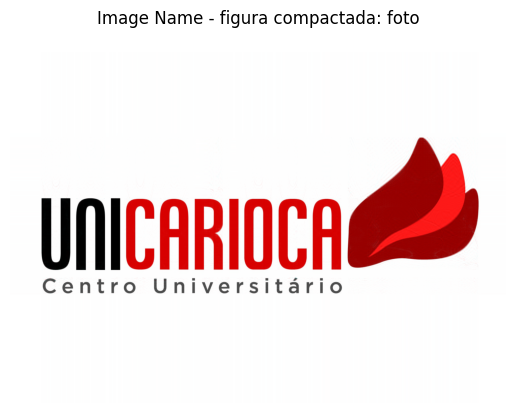

processing...
compressing...
dimensões do canal r: (1240, 1754)
arranging...


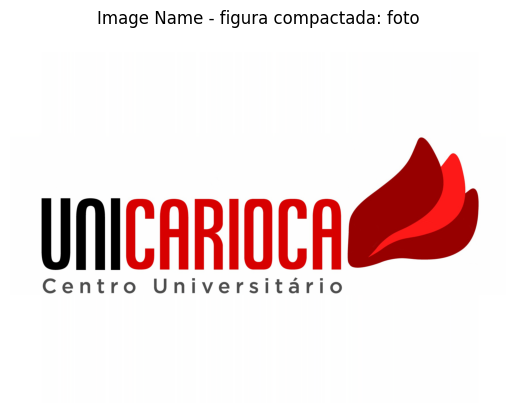

In [19]:
def compress_image(img_name, img, k):
    print("processing...")

    r = img[:, :, 0]  # array  R
    g = img[:, :, 1]  # array  G
    b = img[:, :, 2]  # array  B

    print("compressing...")

    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))



    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    rimg = np.zeros(img.shape)


    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb


    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255


    compressed_image = rimg.astype(np.uint8)


    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)



origem = "https://noticiasconcursos.com.br/wp-content/uploads/2021/10/noticiasconcursos.com.br-como-e-a-prova-de-vestibular-da-unicarioca-unicarioca.jpeg"
image = io.imread(origem)
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


cv2_imshow(image)

print("--------------------------------------------------------------------------------------------")

cv2_imshow(img)
print("--------------------------------------------------------------------------------------------")

image.shape

sdv_values = [0.6, 0.7, 0.8]

sdv_print = ["60%", "70%", "80%"]

for i in range (0, len(sdv_values)):

  k = np.ceil(sdv_values[i]*512)

  print(f"----------{sdv_print[i]}----------")

  k = 100
  compress_image("foto", image, k)

  k = 359
  compress_image("foto", image, k)
